#Importamos libreria a utilizar

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import r2_score
from pylab import *
from scipy import stats

#importamos datos desde un excel

In [7]:
#importing data from xlsx
data = pd.read_excel('../content/data.xlsx')
#data = pd.read_excel('./data.xlsx')

# Vemos la tendencia general de la curba

In [14]:
def price(x):
  aux = []
  for d in x:
    aux.append(data.price[d])
  return aux

def price_diff(x):
  aux = []
  for d in x:
    aux.append(data.price_diff[d])
  return aux

f(x) = 261.3566891366347x+39274.46303258146
R^2 = 0.8386546722416309


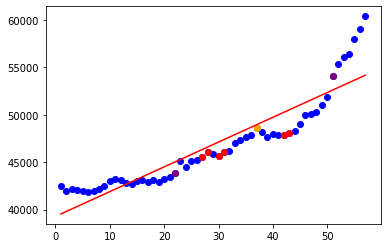

In [27]:
#linear regress
slope, intercept, r_value, p_value, std_err = stats.linregress(data.month, data.price)

#printing slope, intercept and error square
print("f(x) = {}x+{}".format(slope,intercept))
print("R^2 = {}".format(r_value**2))

#linear function
def predict(x):  
  return slope * x + intercept

#ploting
fitLine = predict(data.month)
plt.scatter(data.month, data.price, c='b')
plt.scatter([27, 28, 30, 31, 42, 43], price([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price([21, 50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(data.month, fitLine, c='r')  
plt.show()

y(x) = 184.3737755102041x+40684.0637755102
R^2 = 0.9405145163329641
g(x) = 1101.2142857142858x+-2503.71428571429
R^2 = 0.9735362141743317


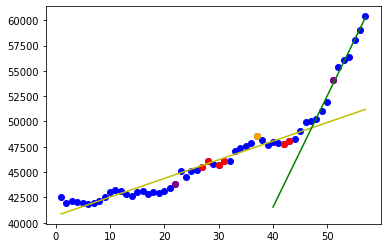

In [ ]:
#linear regress
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(data.month.iloc[:49], data.price.iloc[:49])
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(data.month.iloc[49:], data.price.iloc[49:])

#printing slope, intercept and error square
print("y(x) = {}x+{}".format(slope_1,intercept_1))
print("R^2 = {}".format(r_value_1**2))
print("g(x) = {}x+{}".format(slope_2,intercept_2))
print("R^2 = {}".format(r_value_2**2))


#linear function
def predict_1(x):
  return slope_1 * x + intercept_1

def predict_2(x):
  return slope_2 * x + intercept_2

#ploting
plt.scatter(data.month, data.price, c='b')
plt.scatter([27, 28, 30, 31, 42, 43], price([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price([21, 50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(data.month, predict_1(data.month), c='y')
plt.plot(data.month.iloc[39:], predict_2(data.month.iloc[39:]), c='g')  
plt.show()

f(x) = 17.5588540316308x-195.39974937343356
R^2 = 0.28779835961939515


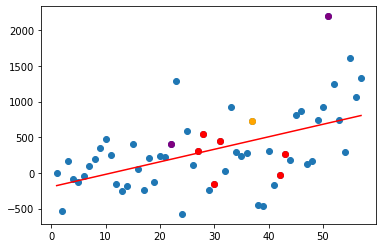

In [16]:
#linear regress
slope, intercept, r_value, p_value, std_err = stats.linregress(data.month, data.price_diff)

#printing slope, intercept and error square
print("f(x) = {}x{}".format(slope,intercept))
print("R^2 = {}".format(r_value**2))

#linear function
def predict(x):  
  return slope * x + intercept

#ploting
fitLine = predict(data.month)
plt.scatter(data.month, data.price_diff)
plt.scatter([27, 28, 30, 31, 42, 43], price_diff([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price_diff([21, 50]), c='purple')
plt.scatter([37], price_diff([36]), c='orange')
plt.plot(data.month, fitLine, c='r')  
plt.show()

#Vemos como el final de la curva tiene una forma cuadratica

f(x) = [ 6.37877633e+00 -1.08612338e+02  4.29124918e+04]
R^2 = 0.9467269041860933


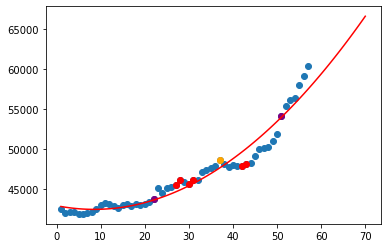

In [17]:
#cuadratic
p2 = np.poly1d(np.polyfit(data.month, data.price, 2))
print("f(x) = {}".format(p2.c))

#getting and printing the error square
r2 = r2_score(data.price, p2(data.month))
print("R^2 = {}".format(r2))

#ploting
xp = np.linspace(1, 70, 100) 
plt.scatter(data.month, data.price)
plt.scatter([27, 28, 30, 31, 42, 43], price([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price([21, 50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(xp, p2(xp), c='r') 
plt.show()

f(x) = [ 4.30477899e+01 -3.41156937e+03  1.15364080e+05]
R^2 = 0.989436660766023


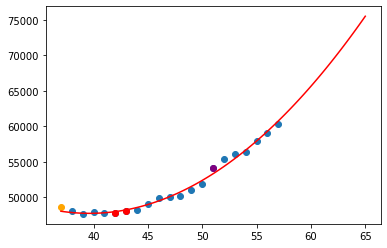

In [22]:
#cuadratic
p2 = np.poly1d(np.polyfit(data.month.iloc[37:], data.price.iloc[37:], 2))
print("f(x) = {}".format(p2.c))

#getting and printing the error square
r2 = r2_score(data.price.iloc[37:], p2(data.month.iloc[37:]))
print("R^2 = {}".format(r2))

#ploting
xp = np.linspace(37, 65, 100)  
plt.scatter(data.month.iloc[37:], data.price.iloc[37:])
plt.scatter([42, 43], price([41, 42]), c='r')
plt.scatter([51], price([50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(xp, p2(xp), c='r') 
plt.show()

f(x) = [ 1.25332205e-02 -1.25981589e+00  4.40259593e+01 -4.30820659e+02
  4.31629662e+04]
R^2 = 0.9853941608357161


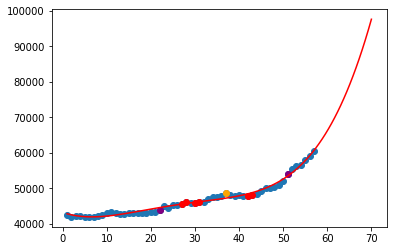

In [24]:
#polinomic 4 grade
p4 = np.poly1d(np.polyfit(data.month, data.price, 4))
print("f(x) = {}".format(p4.c))

#getting and printing the error square
r2 = r2_score(data.price, p4(data.month))
print("R^2 = {}".format(r2))

#ploting
xp = np.linspace(1, 70, 100)  
plt.scatter(data.month, data.price)
plt.scatter([27, 28, 30, 31, 42, 43], price([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price([21, 50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(xp, p4(xp), c='r')
plt.show()

f(x) = [-1.62039403e-05  3.14960230e-03 -2.21855783e-01  7.04782277e+00
 -9.70835774e+01  5.66924291e+02  4.12878244e+04]
R^2 = 0.9891402103968839


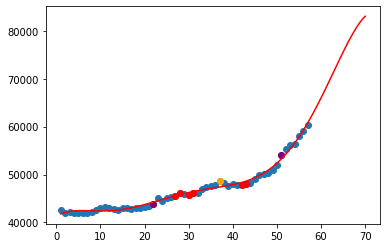

In [25]:
#polinomic 6 grade
p6 = np.poly1d(np.polyfit(data.month, data.price, 6))
print("f(x) = {}".format(p6.c))

#getting and printing the error square
r2 = r2_score(data.price, p6(data.month))
print("R^2 = {}".format(r2))

#ploting
xp = np.linspace(1, 70, 100)  
plt.scatter(data.month, data.price)
plt.scatter([27, 28, 30, 31, 42, 43], price([26, 27, 29, 30, 41, 42]), c='r')
plt.scatter([22, 51], price([21, 50]), c='purple')
plt.scatter([37], price([36]), c='orange')
plt.plot(xp, p6(xp), c='r') 
plt.show()

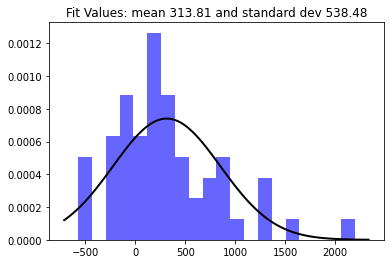

In [ ]:
mean = np.mean(data.price_diff)
std_dev = np.std(data.price_diff)


plt.hist(data.price_diff, bins=20, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: mean {:.2f} and standard dev {:.2f}".format(mean, std_dev)
plt.title(title)
plt.show()

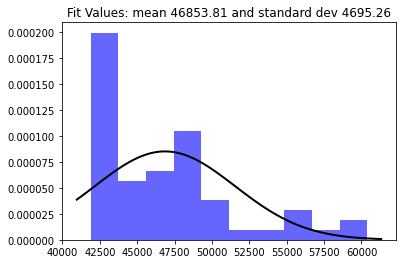

In [ ]:
mean = np.mean(data.price)
std_dev = np.std(data.price)


plt.hist(data.price, bins=10, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: mean {:.2f} and standard dev {:.2f}".format(mean, std_dev)
plt.title(title)
plt.show()

In [ ]:
mean = np.mean(data.price_diff)
stdev_pluss = np.std(data.price_diff)
stdev_minus = np.std(data.price_diff)*-1

print("mean: {}, deviation: {}".format(mean, stdev_pluss))

fig = ff.create_distplot([data.price_diff], ['distplot'], bin_size=100, curve_type='normal')
fig.update_layout(template = 'plotly_dark')
fig.show()

mean: 313.8070175438597, deviation: 538.4797781994246


In [ ]:
mean = np.mean(data.price)
stdev_pluss = np.std(data.price)
stdev_minus = np.std(data.price)*-1

print("mean: {}, deviation: {}".format(mean, stdev_pluss))

fig = ff.create_distplot([data.price], ['distplot'], bin_size=1000, curve_type='normal')
fig.update_layout(template = 'plotly_dark')
fig.show()

mean: 46853.80701754386, deviation: 4695.257571689988
